In [1]:
import warnings
from location_finding_polygon import DAD
import matplotlib.pyplot as plt
import torch
import numpy as np
from shapely.geometry import Polygon
from shapely.plotting import plot_polygon

warnings.filterwarnings("ignore")

c:\Users\n10907700\Anaconda3\envs\dad_vtorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# define the boundary
int = ((0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0))
polygon = Polygon(int)
minx, miny, maxx, maxy = polygon.bounds

In [3]:
design = DAD(
    T=20,
    n=1,
    K=2,
    design_network_type="dad",
    num_steps=5,
    verbose=False,
    adam_betas_wd=[0.9, 0.999, 0],
    lower_bound=torch.tensor([minx, miny]),
    upper_bound=torch.tensor([maxx, maxy]),
)
fitted_design = design.fit()

Loss: 1.960 : 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]


Saved. The experiment-id of this run is 936708953841566871


In [4]:
def plot_design(fitted_design, run_id=1, df=None):
    # get the designs
    df = fitted_design.ho_model.run_df.copy() if df is None else df
    df = df[df["run_id"] == run_id]

    # generate 2 2d grids for the x & y bounds
    x0s, x1s = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

    # get true thetas
    tt = torch.tensor(fitted_design.ho_model.true_thetas[run_id - 1])

    # generate contours
    z = [
        fitted_design.ho_model.forward_map(torch.tensor([x0, x1]).unsqueeze(-2), tt)
        for (x0, x1) in zip(x0s.flatten(), x1s.flatten())
    ]

    # plot
    fig, ax = plt.subplots()
    x, y = polygon.exterior.xy
    ax.plot(x, y, c="red")
    c = ax.pcolormesh(x0s, x1s, np.array(z).reshape(100, 100), cmap="RdBu")
    ax.set_title(
        "Design - {} (n={})".format(fitted_design.design_network_type, fitted_design.n)
    )
    fig.colorbar(c, ax=ax)
    ax.scatter(df.xi_0, df.xi_1, s=2, c="black")
    for i, txt in enumerate(df.order):
        ax.annotate(txt, (df.xi_0[i], df.xi_1[i]))
    plt.show()

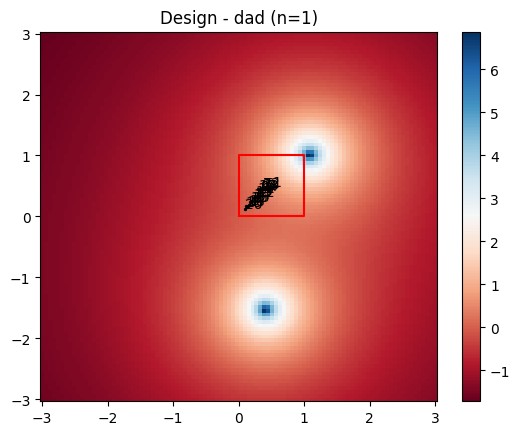

In [5]:
plot_design(fitted_design)